a . Mirroring untuk vertical dan horizontal dilakukan secara bersamaan

<ipython-input-3-2ce6fdb54ec4>:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = img.imread(path)


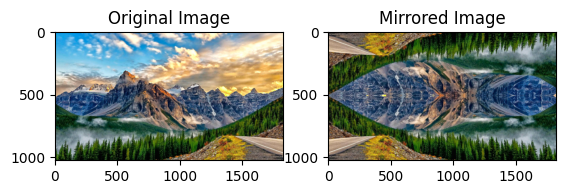

In [3]:
import numpy as np
import imageio as img
import matplotlib.pyplot as plt

# Path gambar
path = '/content/alam-indah.jpg'  # nama file sesuai

# Membaca gambar
image = img.imread(path)

# Mendapatkan dimensi gambar
height, width = image.shape[:2]

# Membuat salinan gambar untuk horizontal dan vertical mirroring
mirrored = np.zeros_like(image)

# Melakukan mirroring secara bersamaan
for y in range(height):
    for x in range(width):
        # Mirroring horizontal
        mirrored[y, x] = image[y, width - 1 - x]
        # Mirroring vertical
        mirrored[height - 1 - y, width - 1 - x] = image[y, x]

# Menampilkan hasil
plt.figure(figsize=(10, 5))

# Menampilkan gambar asli
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title("Original Image")

# Menampilkan gambar setelah horizontal mirroring
plt.subplot(1, 3, 2)
plt.imshow(mirrored)
plt.title("Mirrored Image")

plt.show()


b.	Rotasi Citra menggunakan pivot di titik (0,0) pojok kiri atas

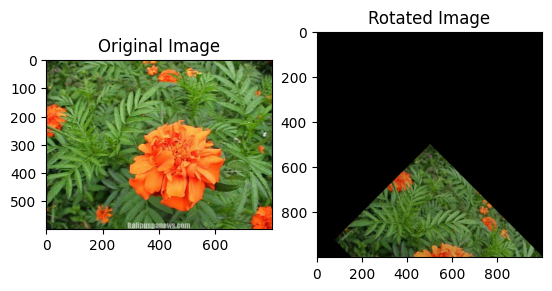

In [4]:
import imageio.v2 as img  # Update to use the correct imageio version
import numpy as np
import matplotlib.pyplot as plt

def rotateImage(image, degree):
    radian_deg = np.radians(degree)
    cos_deg, sin_deg = np.cos(radian_deg), np.sin(radian_deg)

    height, width = image.shape[:2]

    # Ukuran baru gambar setelah rotasi, harus cukup besar untuk menampung gambar yang terrotasi
    max_dim = int(np.sqrt(height**2 + width**2))

    # Gambar output kosong dengan ukuran baru
    outputImage = np.zeros((max_dim, max_dim, 3), dtype=image.dtype)

    # Melakukan rotasi dengan pivot di (0, 0)
    # Looping untuk setiap piksel pada gambar asli
    for y in range(height):
        for x in range(width):
            # Menghitung posisi baru setelah rotasi
            newX = int(cos_deg * x - sin_deg * y)
            newY = int(sin_deg * x + cos_deg * y)

            # Memastikan koordinat baru berada dalam batas gambar output
            newX = newX + (max_dim // 2)
            newY = newY + (max_dim // 2)

            if 0 <= newX < max_dim and 0 <= newY < max_dim:
                outputImage[newY, newX] = image[y, x]

    return outputImage

# Load the image with the correct imageio import
image = img.imread('/content/kembang-kenikir1.jpg')

# Rotate the image by 45 degrees
rotated_image = rotateImage(image, 45)

# Display the original and rotated images side by side
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(rotated_image)
plt.title("Rotated Image")

plt.show()


c.	Zoom Minus untuk memperkecil gambar.



<ipython-input-5-61682236f350>:24: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = img.imread('/content/pemandangan.jpg')


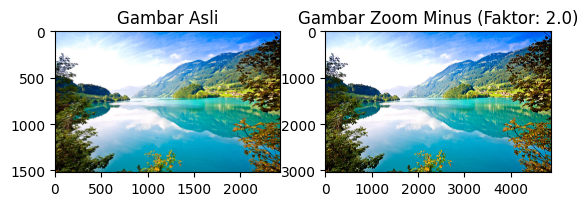

In [5]:
import numpy as np
import imageio as img
import matplotlib.pyplot as plt

def zoomMinus(image, factor):
    height, width = image.shape[:2]
    new_height = int(height * factor)  # Mengurangi resolusi
    new_width = int(width * factor)    # Mengurangi resolusi
    imgZoom = np.zeros((new_height, new_width, 3), dtype=image.dtype)

    for y in range(new_height):
        for x in range(new_width):
            ori_y = int(y / factor)  # Membagi koordinat untuk memperkecil gambar
            ori_x = int(x / factor)  # Membagi koordinat untuk memperkecil gambar

            ori_y = min(ori_y, height - 1)  # Pastikan dalam batas gambar
            ori_x = min(ori_x, width - 1)   # Pastikan dalam batas gambar

            imgZoom[y, x] = image[ori_y, ori_x]

    return imgZoom

# Memuat gambar
image = img.imread('/content/pemandangan.jpg')

# Faktor zoom (lebih besar dari 1 akan memperkecil gambar)
skala = 2.0

# Menghasilkan gambar yang diperkecil
imgZoom = zoomMinus(image, skala)

# Menyimpan gambar hasil zoom
img.imwrite("/content/pemandangan.jpg", imgZoom)

# Menampilkan gambar asli dan gambar yang diperkecil
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Gambar Asli')

plt.subplot(1, 2, 2)
plt.imshow(imgZoom)
plt.title(f'Gambar Zoom Minus (Faktor: {skala})')
plt.show()
